# Part I - (Fordgobike Data Exploration)
## by (Aniekpeno Nelson)

## Introduction
> Introduce the dataset




## Preliminary Wrangling


>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframes
gobike = pd.read_csv('fordgobike_tripdata.csv')

In [3]:
# preview dataset
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#get an overview of the number of rows and columns.
print(gobike.shape)

#check the datatype for all columns in the dataset
print(gobike.dtypes)

#display an overview of the entire dataset
gobike.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
#explore descriptions of numerical variables for possible statistical inferences later.
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The mean birth year is somewhere around 1984, whereas the minimum is 1878, which falls in a completely different century. This points at the possibility of an outlier. This will be looked into further when a box plot rendered for `member_age` - a column that will be created from `member_birth_year`.

### What is the structure of your dataset?

> The Ford GoBike dataset has 183,412 data entries spread across 16 columns. The different variables provide important information & details on:
* __station__ (such as `start_station_id`,`start_station_name`,`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_name`,`end_station_latitude`,`end_station_longitude`); 
* __time__(`duration_sec`,`start_time`,`end_time`); 
* __users__(`user_type`,`member_birth_year`,`member_gender`); and 
* __bikes__ (`bike_id`,`bike_share_for_all_trip`).

> Majority of the variables are rendered as object and float (7 apiece). 2 integer columns add to make up the 16 columns of our dataset.
It is worthy of note however, that these datatypes will likely be changed to more appropriate formats in later wrangling processes.

### What is/are the main feature(s) of interest in your dataset?

> I am especially interested in learning about identities/make up of the Ford GoBike users. In essense, who are their users? And if these identities determine certain variables like, say, duration of ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the age, and gender of users to be a primary pointer the interaction/relationships that exist between users and variables like durations of ride and days of rides (i.e days of the week).

### Wrangling

In [6]:
#Check dataset for null values
gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Since the number of rows of missing data is just a small fraction of the total entries of the dataset, it makes sense to just drop them and proceed with the solid data entries that will be produced (after dropping the rows).

In [8]:
#Permanently drop rows of dataset with null values.
gobike.dropna(axis=0, inplace=True)

Certain columns in our dataset will not be relevant to our analysis, so we'll go ahead and drop them.

In [9]:
#Drop columns that won't be used.

#Round up the columns to be dropped into a list
column_list = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

#Drop columns
gobike.drop(column_list, axis=1, inplace=True)

#### Deduce members' age from `member_birth_year` column

In [10]:
gobike['member_age'] = 2019 - gobike['member_birth_year']
gobike[['member_age']] = gobike[['member_age']].astype('int64')

In [11]:
# confirm new column has been created
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60


### For date...

In the following sections, additional data columns that will help build more intuitions in plots will be generated from several existing columns.

Here, we'll use the `start_time` column to create two new columns, `start_date` and `start__time`.
This will save the date and the time separately, for easy, future manipulations.

In [12]:
# use pandas' str.split() method split data on the conditions set in its arguments, into two new coulumns.
gobike[['start_date','start__time']] = gobike['start_time'].str.split(' ', expand=True)

In [13]:
gobike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,start__time
144335,127,2019-02-07 12:39:21.6360,2019-02-07 12:41:28.8650,343.0,Bryant St at 2nd St,47.0,4th St at Harrison St,4962,Subscriber,1983.0,Male,No,36,2019-02-07,12:39:21.6360


In [14]:
# strip the start__time of the last five characters by splitting it on the "." character...
gobike[['new_start_time','seconds']] = gobike['start__time'].str.split('.', expand=True)

In [15]:
# check to confirm changes
gobike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,start__time,new_start_time,seconds
64127,1041,2019-02-20 12:45:12.7730,2019-02-20 13:02:33.9370,58.0,Market St at 10th St,377.0,Fell St at Stanyan St,5923,Subscriber,2000.0,Male,No,19,2019-02-20,12:45:12.7730,12:45:12,7730


In [16]:
# convert the start_date column to datetime object for facilitate the application of certain methods and functions on it.
gobike.start_date = pd.to_datetime(gobike.start_date)

In [17]:
# confirm datatype
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  object        
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  member_age      

Create a column for ride days. This will come in handy when analysing trends across days of the week. This can be achieved by manipulating a datetime object, in this case, `start date` column.

In [18]:
# use dt.day_name() method to extract days of the week
# [docstring]: dt.day_name() returns the day names of the DateTimeIndex with specified locale.
gobike['ride_days'] = gobike.start_date.dt.day_name()

In [19]:
# check the unique values of the new column
gobike.ride_days.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

Great! At first glance here, it seems we have rides on all weekdays. We'll later delve deeper and  see which of the days of the weeks sees the most rides, or the longest ride durations, as well as other exciting relationships and insights.

### For time...

We will segment the start time into 3 time periods within the day - morning, afternoon and evening.

In [20]:
# set conditions for grouping data into different time periods
x = [
    gobike.start__time < '12:00:00',
    (gobike.start__time > '12:00:00') & (gobike.start__time < '17:00:00'),
   gobike.start__time > '17:00:00'    
]

y = ['morning','afternoon','evening']

In [21]:
# pass the conditions into numpy .select() functions and store it as a new variable.
# Docstring: Return an array drawn from elements in choicelist, depending on conditions.

gobike['time_of_day'] = np.select(x, y)

Next, convert the duration in seconds (i.e `duration_sec` column) into duration in minutes. Minutes are easier to read off, at a glance, as opposed to seconds.

In [22]:
# calculate duration in minutes
gobike['duration_min'] = gobike['duration_sec']/60

In [23]:
# check for, and confirm changes
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,start__time,new_start_time,seconds,ride_days,time_of_day,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35,2019-02-28,17:32:10.1450,17:32:10,1450,Thursday,evening,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47,2019-02-28,12:13:13.2180,12:13:13,2180,Thursday,afternoon,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30,2019-02-28,17:54:26.0100,17:54:26,0100,Thursday,evening,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45,2019-02-28,23:54:18.5490,23:54:18,5490,Thursday,evening,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60,2019-02-28,23:49:58.6320,23:49:58,6320,Thursday,evening,29.883333


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What is the distributon of member genders in the dataset?

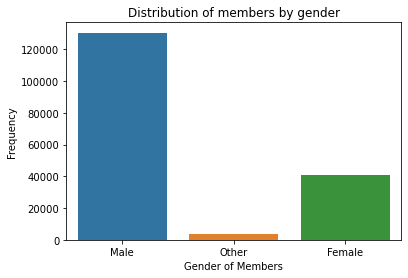

In [27]:
# plot the frequency distribution of the gender of users
mplt.figure()
fig = sb.countplot(data = gobike, x = 'member_gender')
mplt.xlabel('Gender of Members')
mplt.ylabel('Frequency')
mplt.title('Distribution of members by gender')
mplt.show()

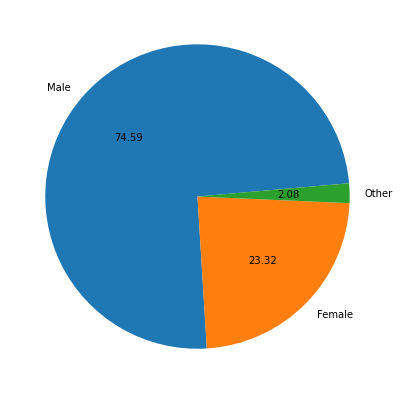

In [27]:
# obtain value counts of member gender and pass it into a variable
gender_counts = gobike['member_gender'].value_counts()
#plot pie chart
mplt.figure(figsize = [7, 7])
mplt.pie(gender_counts, labels = gender_counts.index, startangle = 5, autopct='%.2f');

The gender category labeled as "Others" has the least the lowest frequency of the given genders. The predominant gender are the males, while is about 1/3 of the total male counts.

### What is the distribution for users' ages?

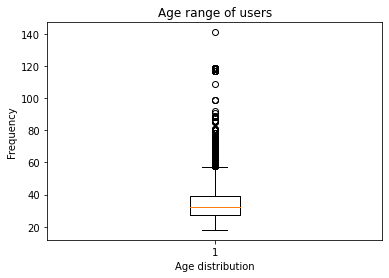

In [28]:
# create a boxplot to further visualize the distribution of member age
mplt.figure()
mplt.boxplot(gobike['member_age'])
mplt.xlabel('Age distribution')
mplt.ylabel('Frequency')
mplt.title('Age range of users')
mplt.show()

### What percentage of user types make up Ford Gobike system?

In [29]:
# obtain value counts of user type and pass it into a variable
user_type_counts = gobike['user_type'].value_counts()

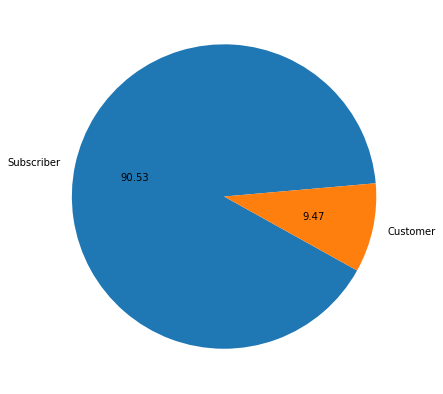

In [34]:
# show the proportion of the user type of Ford GoBike's Systems using a pie chart.

# use figsize argument, and render a larger-than-default figure.
mplt.figure(figsize = [7, 7])
mplt.pie(user_type_counts, labels = user_type_counts.index, startangle = 5, autopct='%.2f');

Subscribers account for about 91% of Ford GoBike users, while the customers make up a little under 10%.

### What time of the day is most popular with Ford GoBike users?

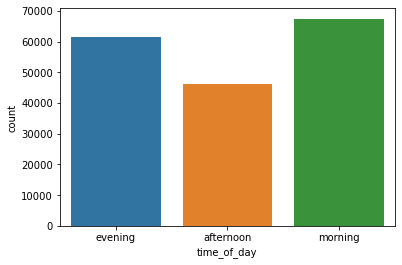

In [35]:
# use seaborn countplot to get counts for periods of the day
# docstring: show the counts of observations in each categorical bin using bars.
sb.countplot(data=gobike, x='time_of_day');

Users tend to ride bikes more in the morning and evenings than during the afternoons. Morning hours however tend to see slightly more riders than the evenings.

### How does frequency of rides compare across different days of the week?

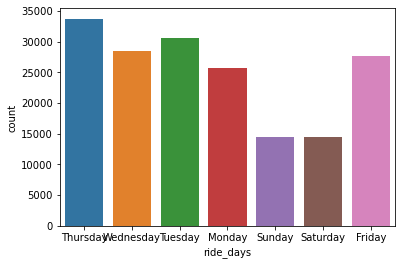

In [36]:
# create a countplot to show the days of the week and its distribution frequencies.
sb.countplot(data=gobike, x='ride_days');

Thursdays, Fridays and Mondays tend to have high very high number of users compared to other week days. Core weekend (Saturday and Sundays) however sees the least activities.
It would seem users have high demand for bike rides towards the weekend and around midweek. 

### What is the age distribution of users?

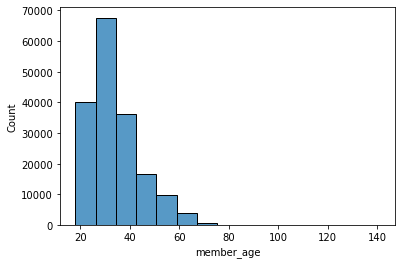

In [33]:
#create histogram with seaborn
sb.histplot(data=gobike, x="member_age", bins=15);

A great proportion of users are between the ages of 20 and 40. The frequency of values beyond the "80" tickmark suggests that they are possibly outliers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### For uncovering the identities of Ford Gobike users...
> The majority of Ford Gobike users are of the male gender. The usertype has the suscribers as majority too. Later, we will see if males are also the majority within this subscribers usertype group too. Age distribution suggests a unimodal frequency distribution showing the 20-40years age range (with ages around 30 having the highest frequency) as the most popular users of the Ford Gobike system.

#### For variables related to time...
> The popular time of the day to go for a ride is in the morning, closely followed by the evenings. Also, of all the days of the week, it is on Thursdays that users use Ford Gobikes the most. 
In subsequent explorations, we'll explore how ride duration interacts with different categories of Ford Gobike users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The boxplot and histplot for age of members revealed outliers. These outliers were removed, as it represents an effective way of handling them. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [36]:
gobike[['duration_min']] = gobike[['duration_min']].astype('float')
gobike[['member_age']] = gobike[['member_age']].astype('float')

#### Days of the week and ride duration.
I want to find out if there are days where users use bikes for longer periods than others. I will group the the duration by ride days and create a barplot to compare them.
The variables will be grouped, a count obtained, then sorted, and reset the index order. 

In [40]:
# pass functions into new variable and preview
ride_minutes = gobike.groupby('ride_days')['duration_min'].count().sort_values().reset_index()
ride_minutes

,ride_days,duration_min
0,Saturday,14414
1,Sunday,14512
2,Monday,25641
3,Friday,27663
4,Wednesday,28426
5,Tuesday,30584
6,Thursday,33712


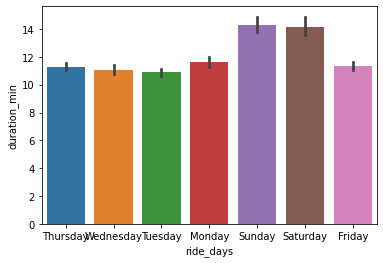

In [43]:
# create a plot to show the relationship.
sb.barplot(data=gobike, x='ride_days', y='duration_min');

On weekends, on Saturdays and Sundays precisely, the durations of the rides are markedly longer than those of the other weekdays.

#### Age group of users and how long they tend to keep their bikes.

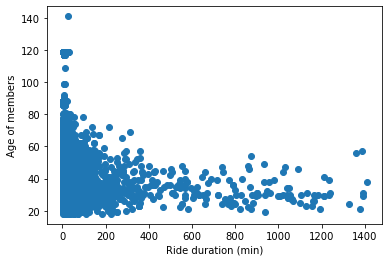

In [44]:
#create a scatter plot to visualize relatinships
mplt.scatter(data = gobike, x = 'duration_min', y = 'member_age');
mplt.xlabel('Ride duration (min)')
mplt.ylabel('Age of members');

Users that are in their 60s and above, do not, under any circumstance keep bikes as long as their comparatively younger counterparts. 

Due to overplotting, we will add jitter and increase transparency to make sense of where the bulk of the data lies.

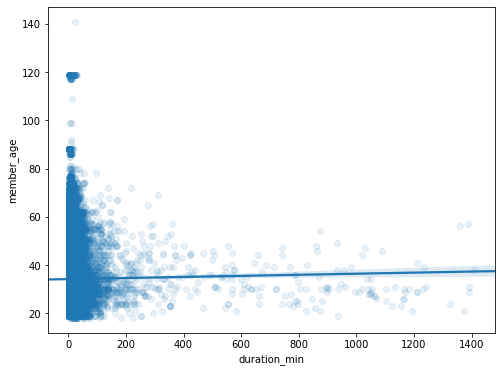

In [35]:
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3

mplt.figure(figsize=[8,6])
sb.regplot(data = gobike, x='duration_min', y='member_age', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});

Majority of the users keep bikes no longer than approximately 100 minutes (i.e about an hour and a half).


#### Does a certain user type have more/less of a gender than the other?

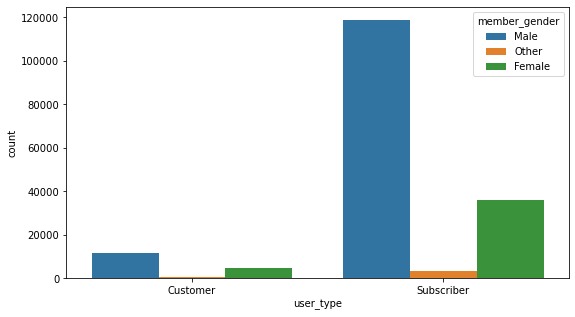

In [46]:
#Which gender uses the most number of bikes?

mplt.figure(figsize=[9, 5])
sb.countplot(data=gobike, x='user_type', hue='member_gender');

Evidently, the Ford GoBike systems have more subscribers than customers. Both categories however maintain a similar proportional trend - there are more males than females, and then more females than users labelled as "Other". In essence, males make up the majority of bike users.

#### What age groups are most popular with the Ford GoBike rides?

In [45]:
# get a count of member age and see possible popular age ranges
gobike.member_age.value_counts(ascending=False)

31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
91         1
141        1
89         1
109        1
92         1
Name: member_age, Length: 75, dtype: int64

Late 20s and early 30s appear to have the highest number of users. These are most likely working class citizens. 
However, lets dive in and get more clarity on how other age groups compare.

Next, we'll categorize age of users and then find out what age bracket use Ford GoBike the most.

In [46]:
#pd.qcut - bins data into discrete intervals based on percentiles
#docstring: Bin values into discrete intervals. Use `cut` when you need to segment and sort data values into bins. This
#   function is also useful for going from a continuous variable to a
#   categorical variable.

labels=['Teenagers', 'Young adult', 'Adult', 'Elderly']
gobike['member_age_class'] = pd.cut(gobike['member_age'], [5, 19, 35, 55, 140], labels=labels) 

In [48]:
gobike.member_age_class.value_counts()

Young adult    112315
Adult           53041
Elderly          7886
Teenagers        1709
Name: member_age_class, dtype: int64

<AxesSubplot:xlabel='member_age_class', ylabel='count'>

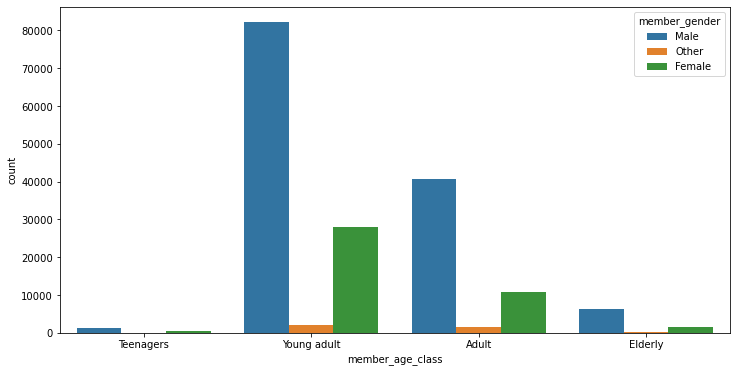

In [49]:
mplt.figure(figsize=[12, 6])
sb.countplot(data=gobike, x='member_age_class', hue='member_gender')

The young adults, especially the male folk, are the most frequent users of the Ford GoBike. The adults come a distant second, while teenagers are surprisingly the least frequent user of bikes.

#### On which day of the week are males/females likely have a high turn out?

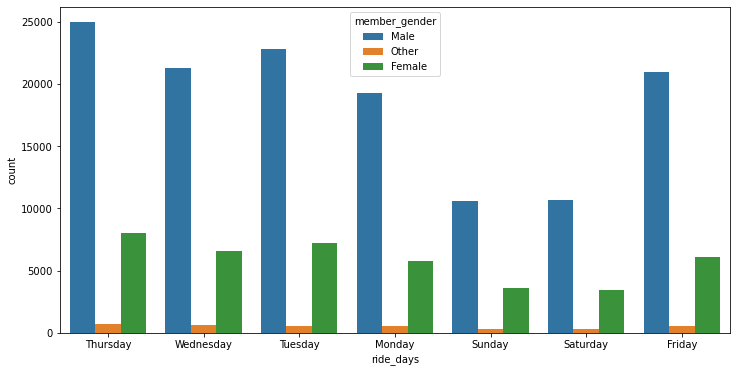

In [45]:
mplt.figure(figsize=[12, 6])
sb.countplot(data=gobike, x='ride_days', hue='member_gender');

On Thursdays, there's more likelihood of male users having high turnout compared to other days. Females are qually likely to have the highest turnout on Thursdays too. Saturdays and Sundays see the lowest for both males and females too

Next, we'll try to take a glance at how variables across the table relates, and see if it supports any of our previous findings from the preceding plots.

<AxesSubplot:>

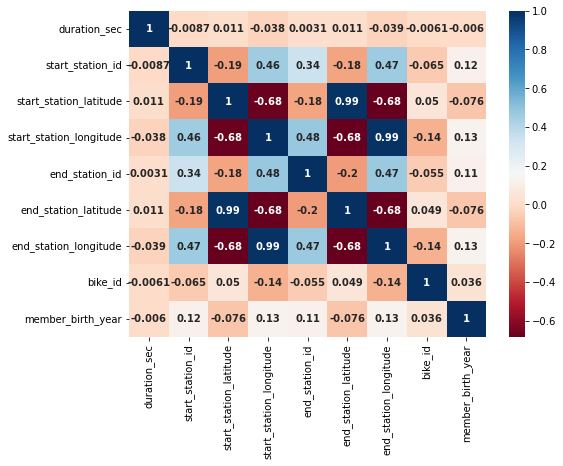

In [4]:
# correlation with heat map
# docstring: corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Ignores all instances of NaN and non-numeric data type

mplt.figure(figsize=[8,6])

corr = gobike.corr()
sb.heatmap(corr, cmap='RdBu', annot=True, 
            annot_kws={'fontsize':10, 'fontweight':'bold'})

The correlation heatmap only shows half the story, because the correlation of most of the data (non-numeric variable) cannot be calculated. Closer to our point of interest might be how age correlates with duration. A correlation of 0.006 shows very small positive to insignificant relationship.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between member age and ride duration was first definitively using a regplot. It showed a weak positive correlation. 
Also, the males of the young adult age group (20 - 35years of age) are the most active users of the Ford GoBikes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Using the countplot shows Tuesdays and Thursdays to be the days when the most rides by users occur. But interstingly, the seaborn barplot seems to suggest that on average, it is on Sundays and Saturdays that users keep the bikes on the road longest (from when the bike is picked, to when it gets back to a staion - i.e duration between stations ).

## Multivariate Exploration


#### Taking proprtions into consideration, which gender has the highest duration, and on which days?

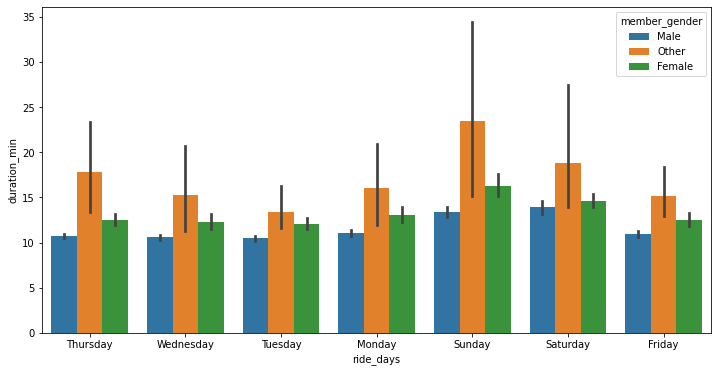

In [25]:
#Docstring:Show point estimates and confidence intervals as rectangular bars.
#A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of
# the uncertainty around that estimate using error bars.

mplt.figure(figsize=[12, 6])
sb.barplot(x='ride_days', y='duration_min', data=gobike, hue='member_gender');

Rendering the data as an estimate of central tendency has helped remove the potential bias arising from the fact that the number of males is disproportionately higher than the other genders. Countplots masked this insight.
Here we can see that using the mean, the gender labelled "Other" spend relatively more minutes on their trip compred to their Female and Male counterparts, every other day of the week.
Surprisingly, the male have the least comparative ride duration of the other 2 gender groups.

#### Around which age range are the distributions largest?

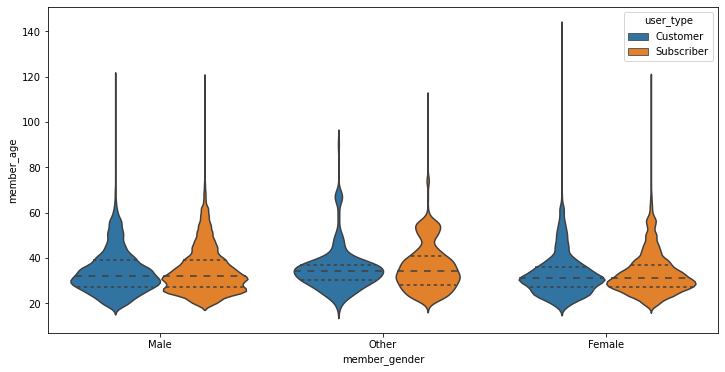

In [26]:
#create a boxplot for member gender and age, and facet by user type
#Docstring:Draw a combination of boxplot and kernel density estimate. It shows the distribution of quantitative data across several levels of one (or more)
# categorical variables such that those distributions can be compared.

mplt.figure(figsize=[12, 6])
sb.violinplot(data=gobike, inner='quartile', x='member_gender', y='member_age', hue='user_type');

Members of different genders across the two user types have the bulk of their age distribution between 20 and 40year olds. The median, 1st and third quartile across all groups sit pretty evenly at around 35, 26 and 40 respectively, although the gender label "Other" has a sizably dense distribution just above age 40. Also, the youngest users appear to be male customers of this gender label.


#### With regards to duration, is there any relationship between member age class across the two user types?

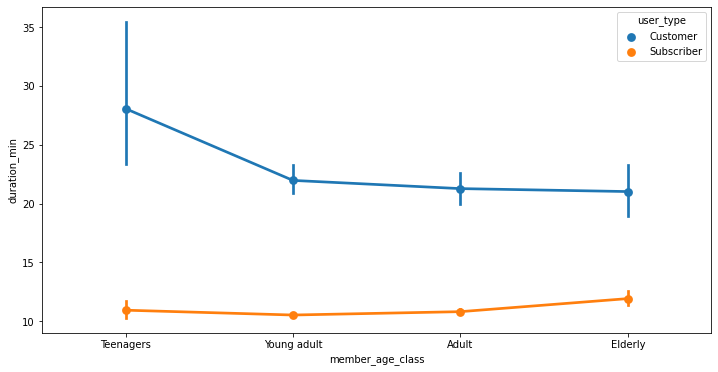

In [58]:
mplt.figure(figsize=[12, 6])
sb.pointplot(data=gobike, x='member_age_class', y='duration_min', hue='user_type');

Teenage customers are most likely to keep bikes for longer on average while their subsciber counterparts are the least likely to do same.
For subscribers, the elderly folks stay longer with bikes on average.

#### Colourful view of how ages of genders is distributed across durations

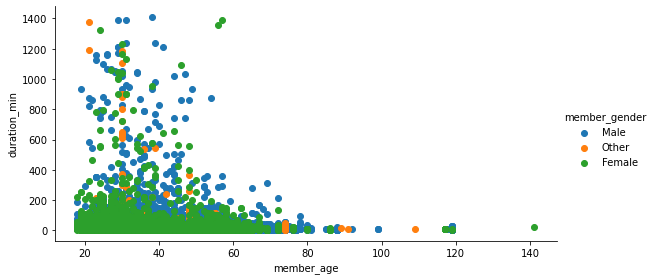

In [75]:
#Docstring: Multi-plot grid for plotting conditional relationships.
#This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels 
#of variables in the dataset. It can also represent levels of a third variable with the ``hue``
#parameter, which plots different subsets of data in different colors.

g = sb.FacetGrid(data = gobike, hue = 'member_gender', height=4, aspect=2);
g.map(mplt.scatter, 'member_age', 'duration_min')
g.add_legend()

Most users under 60 years. Long durations are not exactly peculiar to just one gender, as all 3 gender labels seem suitably represented from the 400 minutes mark upwards.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In as much as more males use Ford Gobikes, it is the female who it for a longer duration on average. If longer duration equates to higher revenue for the company, they might want to develop a strategy to attract more female uers, which will even help close the gap on the disproportionately larger population of male users. 
Also, between the customer and subscriber groups, across all age groups, the former always average more duration (minutes) than the latter.

### Were there any interesting or surprising interactions between features?

> Teenage customers have the highest average ride duration of age classes for customers (and subscribers user type too). 
You would expect teenage subscribers to fare better than their adult and elderly counterparts, but no! They average the lowest ride duration of all age groups within the subscribers user type, which is a bit surprising - from a high on one end, to rock bottom on the other end.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> Ford Gobike systems is really popular with the male folks. This is evident as males make up roughly 75% of the users, dwarfing female population who are a distant second making up only about 23%. 
This notwithstanding, females average more ride durations than their male counterparts. 
Thursdays see the highest activities (more individuals using Ford Gobike) but it is during the weekends (Sundays and Saturdays) that the ride durations are longest.
Coincidentally, it is on these weekends that a certain gender has the highest average ride duration - the females!
As suggested earlier, if long ride durations translate to positive output for the company, then more female customers can be targeted in say, advertisement campaigns.
Another group of users that can be a point of interest for the company is the young adults age class (especially the male). They make up the bulk of users of the Ford Gobike systems. Targeted advertisements can also be directed at this age class, or strategies to retain their loyalties can be developed.